In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
import IPython.display as ipd
import librosa
import librosa.display as ld

In [2]:
def dct01a(x, K, M, lp_h):
    lp_L = len(lp_h)
    lp_h = lp_h * M
    
    # Модуляция фильтра - получение матрицы канальных фильтров
    n = np.arange(lp_L) - ((lp_L - 1) / 2)
    n = n * np.pi / K
    
    m = np.zeros((K, lp_L))
    for k in range(K):
        if k % 2 == 1:
            m[k, :] = lp_h * (2 * np.cos((1 * k + 0.5) * n + 1 * np.pi / 4))
        else:
            m[k, :] = lp_h * (2 * np.cos((1 * k + 0.5) * n - 1 * np.pi / 4))
    
    # Фильтрация
    X = np.zeros((K, len(x)))
    for k in range(K):
        X[k, :] = signal.lfilter(m[k], 1, x)
        
    X = X[:, ::M]
    
    return X

In [3]:
def dct01s(X, M, lp_h):
    K = X.shape[0]
    
    # Фильтр прототип
    lp_L = len(lp_h)
    lp_h = lp_h * M
    # Модуляция фильтра - получение матрицы канальных фильтров
    n = np.arange(lp_L) - ((lp_L - 1) / 2)
    n = n * np.pi / K
    
    m = np.zeros((K, lp_L))
    for k in range(K):
        if k % 2 == 1:
            m[k, :] = lp_h * (2 * np.cos((1 * k + 0.5) * n - 1 * np.pi / 4))
        else:
            m[k, :] = lp_h * (2 * np.cos((1 * k + 0.5) * n + 1 * np.pi / 4))
            
    n = m / M
    # Добавление нулевых отсчетов
    Y = np.zeros((K, X.shape[1] * M))
    Y[:, ::M] = X
    
    y = 0
    for k in range(K):
        y += signal.lfilter(m[k], 1, Y[k])
    return y

In [4]:
fs = 22050
K = 8
cutoff = (fs / 2) / K / 2
M = 8

In [5]:
b = signal.firwin(256, cutoff, fs=fs, window='nuttall')

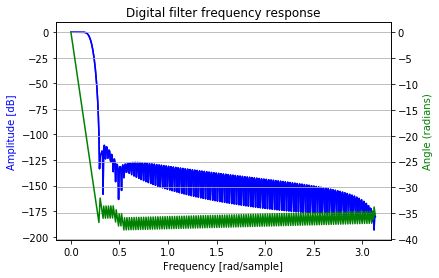

In [6]:
w, h = signal.freqz(b)

fig, ax1 = plt.subplots()
ax1.set_title('Digital filter frequency response')
ax1.plot(w, 20 * np.log10(abs(h)), 'b')

ax1.plot(w, 20 * np.log10(abs(h)), 'b')
ax1.set_ylabel('Amplitude [dB]', color='b')
ax1.set_xlabel('Frequency [rad/sample]')

ax2 = ax1.twinx()
angles = np.unwrap(np.angle(h))
ax2.plot(w, angles, 'g')
ax2.set_ylabel('Angle (radians)', color='g')
ax2.grid()
ax2.axis('tight');

In [8]:
y, _ = librosa.load('test.wav', sr=fs)

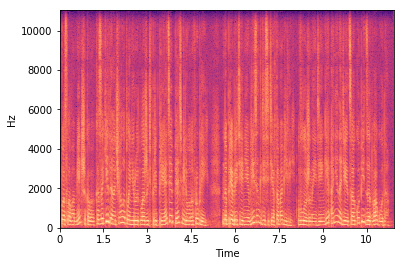

In [9]:
stft = librosa.stft(y, n_fft=2024, hop_length=256)
mag = 20 * np.log10(np.abs(stft))
ld.specshow(mag, hop_length=256, y_axis='hz', x_axis='time')

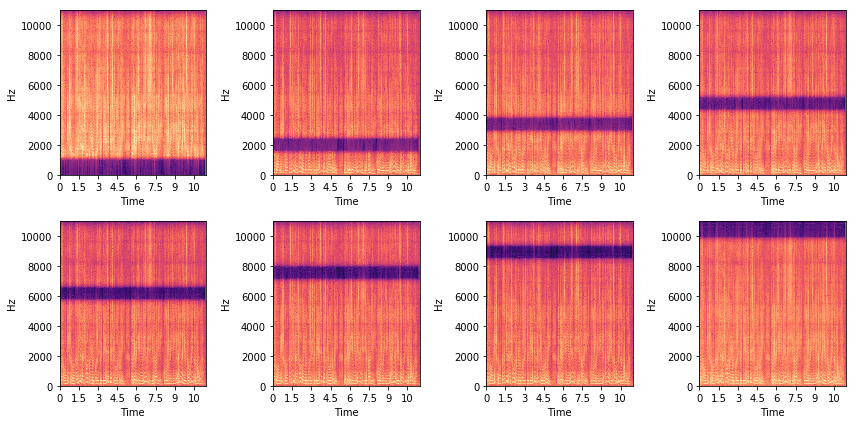

In [10]:
plt.figure(figsize=(12, 6))
for i in range(8):
    X = dct01a(y, K, M, b)
    X[i] = 0.

    y_ = dct01s(X, M, b)
    y_ = y_ / M
    stft = librosa.stft(y_, n_fft=2024, hop_length=256)
    mag = 20 * np.log10(np.abs(stft))
    ax = plt.subplot(2, 4, i+1)
    ld.specshow(mag, hop_length=256, y_axis='hz', x_axis='time', ax=ax)
plt.tight_layout()

In [11]:
ipd.Audio(y_, rate=22050)